A private agency conducted a survey and collected the sales details of news communicated via Newspaper, Facebook and YouTube which is available in “Regression_analysis_dataset.csv”. Load this data set and develop a prediction model to forecast the sales details given Newspaper, Facebook, and YouTube as predictors. “Sales” to be considered as Target variable 
Below mentioned tasks must be performed as part of the model building:
1.	Load the data set and print the descriptive statistics of the data.
2.	Handle the missing values appropriately if any. 
3.	Check is there are any outliers.
4.	Find the distribution of predictor variable using graphical approach.
5.	Perform bi-variate analysis between each predictor variable with the target variable. 


## 1.Load the data set and print the descriptive statistics of the data.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv("sales77.csv")

In [107]:
df

,youtube,facebook,newspaper,sales
0,84.72,19.2,48.96,12.6
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.8,36,11.52
4,318.72,24,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.4,11.16,7.68,15.36
169,340.32,50.4,79.44,30.6


In [108]:
df.describe()

,youtube,facebook,newspaper,sales
count,171,171,171,171
unique,163,142,146,112
top,?,?,10.44,14.04
freq,3,5,3,4


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   youtube    171 non-null    object
 1   facebook   171 non-null    object
 2   newspaper  171 non-null    object
 3   sales      171 non-null    object
dtypes: object(4)
memory usage: 5.5+ KB


In [110]:
df.replace('?',np.NaN, inplace = True)

In [111]:
df['youtube'] = pd.to_numeric(df.youtube)

In [112]:
df['facebook'] = pd.to_numeric(df.facebook)

In [113]:
df['newspaper'] = pd.to_numeric(df.newspaper)

In [114]:
df['sales'] = pd.to_numeric(df.sales)

In [115]:
df.isna().any()

youtube      True
facebook     True
newspaper    True
sales        True
dtype: bool

## 2.Handle the missing values appropriately if any.

In [116]:
df["facebook"].value_counts()

6.84     3
4.92     3
10.08    2
16.68    2
44.28    2
        ..
25.32    1
40.08    1
49.80    1
18.48    1
9.84     1
Name: facebook, Length: 141, dtype: int64

In [117]:
df.isna().any()

youtube      True
facebook     True
newspaper    True
sales        True
dtype: bool

In [118]:
df.loc[df.isna().sum(1)>=1].index.tolist()

[7, 11, 15, 27, 31, 35, 47, 52, 63, 70, 80, 92]

In [119]:
df.iloc[7]

youtube      320.28
facebook      52.56
newspaper       NaN
sales         30.48
Name: 7, dtype: float64

In [120]:
df["youtube"].fillna(value=df["youtube"].mean(),inplace=True)

In [121]:
df["facebook"].fillna(value=df["facebook"].mean(),inplace=True)

In [122]:
df["newspaper"].fillna(value=df["newspaper"].mean(),inplace=True)

In [123]:
df["sales"].fillna(value=df["sales"].mean(),inplace=True)

In [124]:
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [125]:
df.iloc[7]

youtube      320.280000
facebook      52.560000
newspaper     35.274286
sales         30.480000
Name: 7, dtype: float64

In [126]:
k1=df["newspaper"].mean()

In [127]:
df.loc[df.isna().sum(1)>=1].index.tolist()

[]

## 3.Check is there are any outliers.

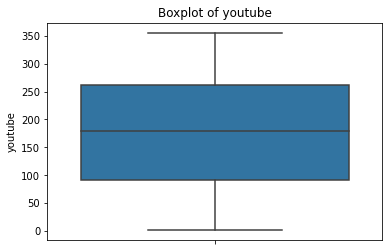

In [128]:
import seaborn as sns
sns.boxplot(y=df["youtube"])
plt.title("Boxplot of youtube")
plt.show()

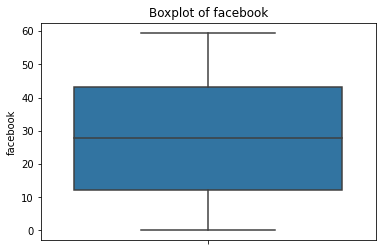

In [129]:
import seaborn as sns
sns.boxplot(y=df["facebook"])
plt.title("Boxplot of facebook")
plt.show()

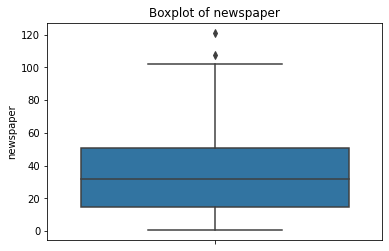

In [130]:
import seaborn as sns
sns.boxplot(y=df["newspaper"])
plt.title("Boxplot of newspaper")
plt.show()

<ipython-input-131-f9964bbdf87e>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


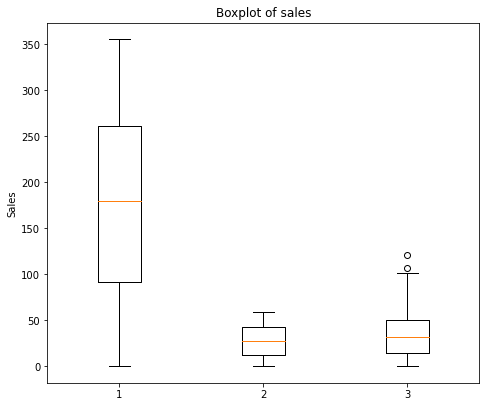

In [131]:
df_list=[df["youtube"],df["facebook"],df["newspaper"]]

fig = plt.figure(figsize=[6,5])
#setting axes
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Boxplot of sales')
ax.set_ylabel('Sales')

ax.boxplot(df_list)
fig.show()

In [132]:
print(df["newspaper"].nlargest(3).values)

[121.08 107.28 101.76]


In [133]:
print(df["newspaper"].nlargest(3).index.tolist())

[72, 46, 136]


In [134]:
k=df["newspaper"].mean()
k

35.274285714285696

In [135]:
df.iloc[7]=df.iloc[72].fillna(value=df["newspaper"].mean(),inplace=True)

In [136]:
df_list

[0       84.72
 1      351.48
 2      135.48
 3      116.64
 4      318.72
         ...  
 166     45.84
 167    113.04
 168    212.40
 169    340.32
 170    278.52
 Name: youtube, Length: 171, dtype: float64,
 0      19.20
 1      33.96
 2      20.88
 3       1.80
 4      24.00
        ...  
 166     4.44
 167     5.88
 168    11.16
 169    50.40
 170    10.32
 Name: facebook, Length: 171, dtype: float64,
 0      48.96
 1      51.84
 2      46.32
 3      36.00
 4       0.36
        ...  
 166    16.56
 167     9.72
 168     7.68
 169    79.44
 170    10.44
 Name: newspaper, Length: 171, dtype: float64]

## 4.Find the distribution of predictor variable using graphical approach.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

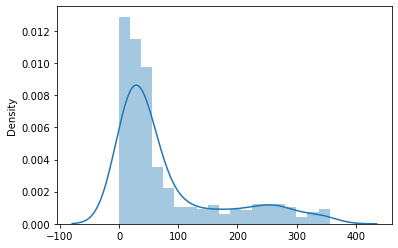

In [137]:
sns.distplot(df_list)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

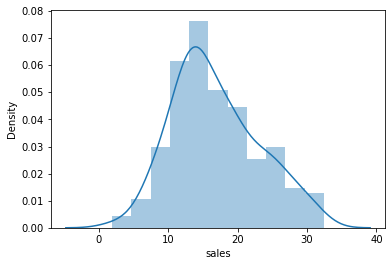

In [138]:
sns.distplot(df["sales"])

## 5.Perform bi-variate analysis between each predictor variable with the target variable.

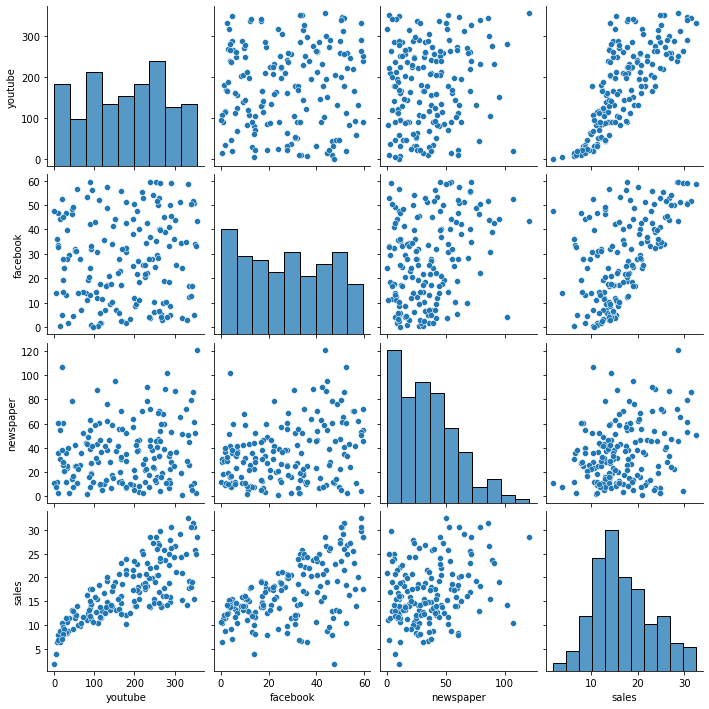

In [139]:
sns.pairplot(df)